In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:

from IPython.display import display, Markdown

import sys
sys.path.append('.')

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


from util import (
  draw_graphs as _draw_graphs,
  plot_distance_heatmap,
  plot_max_match_results
)
from pipeline import make_pipeline

from mcopt import ot, MorseGraph

In [3]:
pipeline = make_pipeline()

tangaroa = pipeline.dataset('tangaroa')

display(Markdown(tangaroa.display_description()))


# Tangaroa


TODO
 


In [4]:
graphs = pipeline.graph('tangaroa').build().frames
nets = pipeline.mm_network('tangaroa').build().frames
attributes = pipeline.attributes('tangaroa').build()

> [graph:tangaroa] config unchanged, loading


> [mmnetwork:tangaroa] config unchanged, loading


> [attributes:tangaroa] config unchanged, loading


In [5]:
src_net = nets[51]
dest_net = nets[52]
src = graphs[51]
dest = graphs[52]

In [6]:
max_match_pfgw = pipeline.max_match('tangaroa_max_match_pfgw').build()


> [max_match:tangaroa_max_match_pfgw] config unchanged, loading


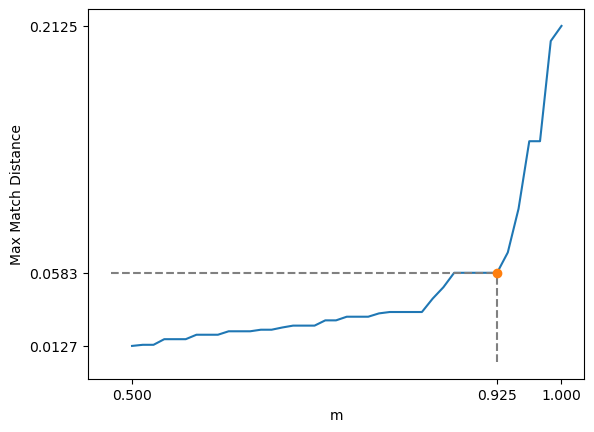

In [7]:
m = 0.925

fig, ax = plt.subplots()
  
x = max_match_pfgw.ms
y = max_match_pfgw.results[:, 4]

ax.plot(x, y)

ymin, _ = ax.get_ybound()
xmin, _ = ax.get_xbound()

i = np.abs(x - m).argmin()

ax.add_line(Line2D([x[i], x[i]], [ymin, y[i]], color='grey', linestyle='--'))
ax.add_line(Line2D([xmin, x[i]], [y[i], y[i]], color='grey', linestyle='--'))
ax.plot(x[i], y[i], marker='o')

ax.set_xlabel('m', fontsize=10)
ax.set_ylabel('Max Match Distance', fontsize=10)

ax.set_xticks([x.min(), x[i], x.max()])
ax.set_yticks([y.min(), y[i], y.max()])

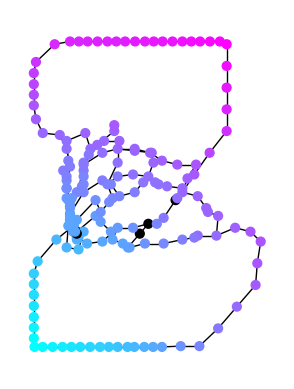

In [8]:

coupling, _ = ot.pfGW(
  src_net, 
  dest_net, 
  m = m,
  M = attributes.attrs[attributes.index_map[51], attributes.index_map[52]],
)

src_node_color = src.node_color_by_position()

fig, ax = plt.subplots()

dest.draw(
  ax = ax,
  cmap = 'cool',
  node_color = dest.node_color_by_coupling(src_node_color, coupling),
)

fig.savefig('figures/tangaroa_pfgw_individual.0052.png', dpi=300)

In [9]:
max_match_pw = pipeline.max_match('tangaroa_max_match_pw').build()

max_match_pw.results.shape

> [max_match:tangaroa_max_match_pw] config unchanged, loading


(41, 14)

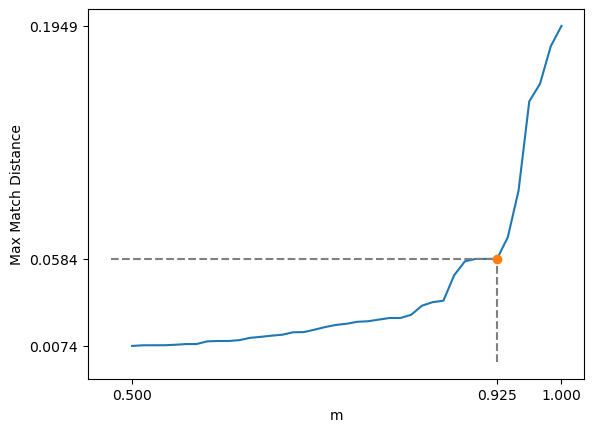

In [10]:
m = 0.925

fig, ax = plt.subplots()
  
x = max_match_pw.ms
y = max_match_pw.results[:, 4]

ax.plot(x, y)

ymin, _ = ax.get_ybound()
xmin, _ = ax.get_xbound()

i = np.abs(x - m).argmin()

ax.add_line(Line2D([x[i], x[i]], [ymin, y[i]], color='grey', linestyle='--'))
ax.add_line(Line2D([xmin, x[i]], [y[i], y[i]], color='grey', linestyle='--'))
ax.plot(x[i], y[i], marker='o')

ax.set_xlabel('m', fontsize=10)
ax.set_ylabel('Max Match Distance', fontsize=10)

ax.set_xticks([x.min(), x[i], x.max()])
ax.set_yticks([y.min(), y[i], y.max()])

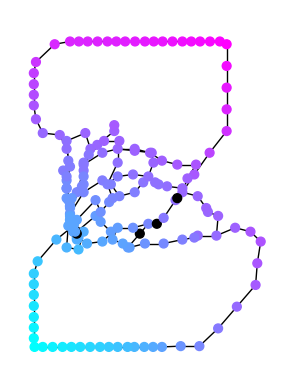

In [11]:
coupling, _ = ot.pWasserstein(
  src_net, 
  dest_net, 
  m = m,
  M = attributes.attrs[attributes.index_map[51], attributes.index_map[52]],
)
src_node_color = src.node_color_by_position()

fig, ax = plt.subplots()

dest.draw(
  ax = ax,
  cmap = 'cool',
  node_color = dest.node_color_by_coupling(src_node_color, coupling),
)

fig.savefig('figures/tangaroa_pw_individual.0052.png', dpi=300)

In [13]:
m_start = 0.75
m_end = 1
num_ms = 30
  
ms = [m_start + i * (m_end - m_start) / num_ms for i in range(num_ms)] + [m_end]

src_net = nets[51]
dest_net = nets[52]

distances = np.zeros(shape = len(ms))

for i, m in enumerate(ms):
  if np.isclose(m, 1):
    _, d = ot.GW(src_net, dest_net)
  else:
    _, d = ot.pGW(
      src_net, 
      dest_net, 
      m = m,
    )
  
  print(f'm = {m}, d = {d}')
  distances[i] = d

m = 0.75, d = 0.004456644838416587
m = 0.7583333333333333, d = 0.0045976927913472625
m = 0.7666666666666667, d = 0.0074503606554920335
m = 0.775, d = 0.005183738690991542
m = 0.7833333333333333, d = 0.005361887741951491
m = 0.7916666666666666, d = 0.005538833956829917
m = 0.8, d = 0.005730001580428031
m = 0.8083333333333333, d = 0.005567741510232398
m = 0.8166666666666667, d = 0.00572508754634705
m = 0.825, d = 0.005841651073398748
m = 0.8333333333333334, d = 0.009138193424704809
m = 0.8416666666666667, d = 0.01768761933517989
m = 0.85, d = 0.006579714906128805
m = 0.8583333333333334, d = 0.006759744376647952
m = 0.8666666666666667, d = 0.006972523561422027
m = 0.875, d = 0.007199007597530391
m = 0.8833333333333333, d = 0.00742793962340511
m = 0.8916666666666666, d = 0.0076879360449372235
m = 0.9, d = 0.007935463124828419
m = 0.9083333333333333, d = 0.008211304364608875
m = 0.9166666666666666, d = 0.008538028800815837
m = 0.925, d = 0.00890960165426716
m = 0.9333333333333333, d = 0.009

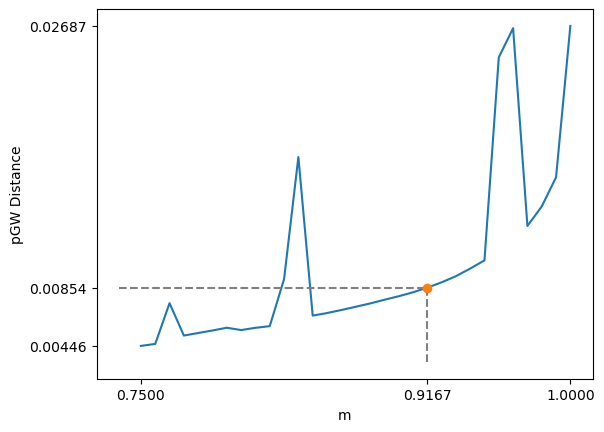

In [14]:
m = 0.9167

fig, ax = plt.subplots()
  
x = np.asarray(ms)
y = distances

ax.plot(x, y)

ymin, _ = ax.get_ybound()
xmin, _ = ax.get_xbound()

i = np.abs(x - m).argmin()

ax.add_line(Line2D([x[i], x[i]], [ymin, y[i]], color='grey', linestyle='--'))
ax.add_line(Line2D([xmin, x[i]], [y[i], y[i]], color='grey', linestyle='--'))
ax.plot(x[i], y[i], marker='o')

ax.set_xlabel('m', fontsize=10)
ax.set_ylabel('pGW Distance', fontsize=10)

ax.set_xticks([x.min(), x[i], x.max()])
ax.set_yticks([y.min(), y[i], y.max()])

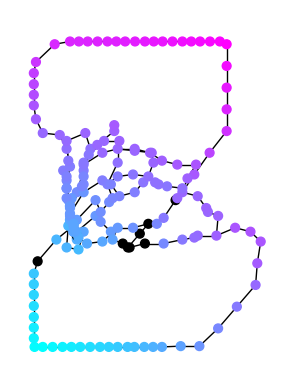

In [15]:
src_net = nets[51]
dest_net = nets[52]

coupling, _ = ot.pGW(
  src_net, 
  dest_net, 
  m = m,
)

src = graphs[51]
dest = graphs[52]

src_node_color = src.node_color_by_position()

fig, ax = plt.subplots()

dest.draw(
  ax = ax,
  cmap = 'cool',
  node_color = dest.node_color_by_coupling(src_node_color, coupling),
)

fig.savefig('figures/tangaroa_pgw_individual.0052.png', dpi=300)